In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("D:\DOwn\MaunaLoaDailyTemps _1_ _2_.csv")

In [3]:
data.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [4]:
data.shape

(1825, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1825 non-null   object 
 1   MinTemp  1821 non-null   float64
 2   MaxTemp  1821 non-null   float64
 3   AvgTemp  1821 non-null   float64
 4   Sunrise  1825 non-null   int64  
 5   Sunset   1825 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 85.7+ KB


In [6]:
data["DATE"]=pd.to_datetime(data["DATE"])

In [7]:
import datetime as dt

In [8]:
data["Sunset"]=pd.to_datetime(data["Sunset"],format="%H%M")

In [9]:
data["Sunrise"]=pd.to_datetime(data["Sunrise"],format="%H%M")

In [10]:
data["Sunrise"].dt.time

0       06:57:00
1       06:57:00
2       06:57:00
3       06:58:00
4       06:58:00
          ...   
1820    06:54:00
1821    06:55:00
1822    06:55:00
1823    06:55:00
1824    06:56:00
Name: Sunrise, Length: 1825, dtype: object

In [11]:
data.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,2014-01-01,33.0,46.0,40.0,1900-01-01 06:57:00,1900-01-01 17:56:00
1,2014-01-02,35.0,50.0,43.0,1900-01-01 06:57:00,1900-01-01 17:56:00
2,2014-01-03,36.0,45.0,41.0,1900-01-01 06:57:00,1900-01-01 17:57:00
3,2014-01-04,32.0,41.0,37.0,1900-01-01 06:58:00,1900-01-01 17:57:00
4,2014-01-05,24.0,38.0,31.0,1900-01-01 06:58:00,1900-01-01 17:58:00


In [12]:
data["Sunrise"]=data["Sunrise"].dt.time

In [13]:
data["Sunset"]=data["Sunset"].dt.time

In [14]:
data.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,2014-01-01,33.0,46.0,40.0,06:57:00,17:56:00
1,2014-01-02,35.0,50.0,43.0,06:57:00,17:56:00
2,2014-01-03,36.0,45.0,41.0,06:57:00,17:57:00
3,2014-01-04,32.0,41.0,37.0,06:58:00,17:57:00
4,2014-01-05,24.0,38.0,31.0,06:58:00,17:58:00


In [15]:
data.index=data["DATE"]

In [16]:
data=data.drop("DATE",axis=1)

In [17]:
data.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,06:57:00,17:56:00
2014-01-02,35.0,50.0,43.0,06:57:00,17:56:00
2014-01-03,36.0,45.0,41.0,06:57:00,17:57:00
2014-01-04,32.0,41.0,37.0,06:58:00,17:57:00
2014-01-05,24.0,38.0,31.0,06:58:00,17:58:00


In [18]:
data.isnull().sum()

MinTemp    4
MaxTemp    4
AvgTemp    4
Sunrise    0
Sunset     0
dtype: int64

In [19]:
data["MinTemp"]=data["MinTemp"].fillna(data["MinTemp"].mean())

In [20]:
data["MaxTemp"]=data["MaxTemp"].fillna(data["MaxTemp"].mean())
data["AvgTemp"]=data["AvgTemp"].fillna(data["AvgTemp"].mean())


In [21]:
data.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,06:57:00,17:56:00
2014-01-02,35.0,50.0,43.0,06:57:00,17:56:00
2014-01-03,36.0,45.0,41.0,06:57:00,17:57:00
2014-01-04,32.0,41.0,37.0,06:58:00,17:57:00
2014-01-05,24.0,38.0,31.0,06:58:00,17:58:00


In [22]:
data.isnull().sum()

MinTemp    0
MaxTemp    0
AvgTemp    0
Sunrise    0
Sunset     0
dtype: int64

In [23]:
from statsmodels.tsa.statespace import sarimax
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [24]:
data.shape

(1825, 5)

In [25]:
365*4

1460

In [26]:
train=data[:1460]["AvgTemp"]
test=data[1461:]["AvgTemp"]

In [27]:
train.shape

(1460,)

In [28]:
test.shape

(364,)

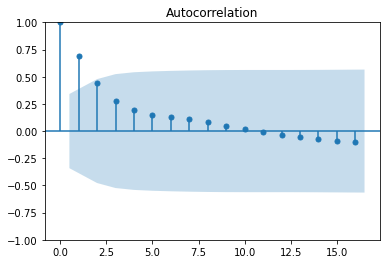

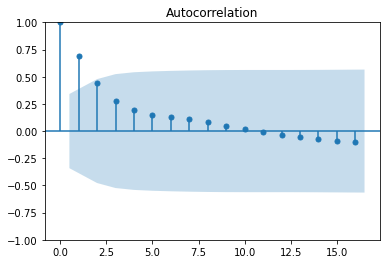

In [35]:
plot_acf(acf(data["AvgTemp"]))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


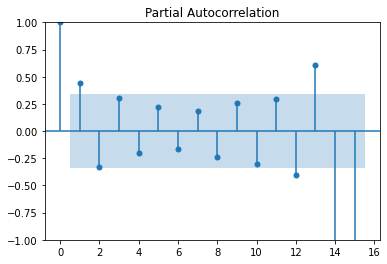

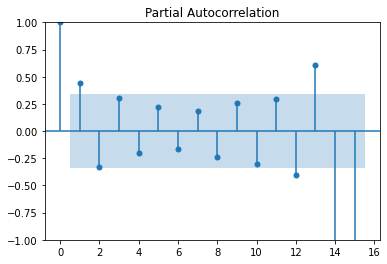

In [52]:
plot_pacf(pacf(data["AvgTemp"]),lags=15)


In [54]:
#model fitting

model=ARIMA(data["AvgTemp"],order=(1,0,5))               # here 1,0,5 is checking bcz of the assignment question
model_fit=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [55]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1825
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4151.718
Date:                Tue, 21 Mar 2023   AIC                           8319.436
Time:                        01:16:41   BIC                           8363.510
Sample:                    01-01-2014   HQIC                          8335.694
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5251      0.761     61.155      0.000      45.034      48.016
ar.L1          0.9862      0.005    194.999      0.000       0.976       0.996
ma.L1         -0.1452      0.023     -6.353      0.000      -0.190      -0.100
ma.L2         -0.2338      0.023    -10.101      0.000      -0.279      -0.188
ma.L3         -0.2077      0.023     -8.939      0.000      -0.253      -0.162
ma.L4         -0.1506      0.023     -6.660      0.000      -0.195      -0.106
ma.L5         -0.0614      0.024     -2.526      0.012      -0.109      -0.014
sigma2         5.5351      0.174     31.900      0.000       5.195       5.875
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                15.11
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# since we forget to visualise so doing right here

<AxesSubplot:xlabel='DATE'>

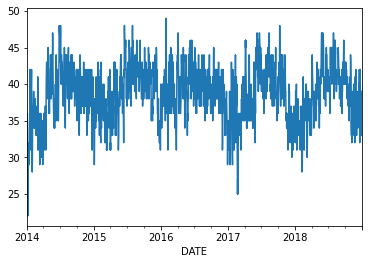

In [58]:
data["MinTemp"].plot()

<AxesSubplot:xlabel='DATE'>

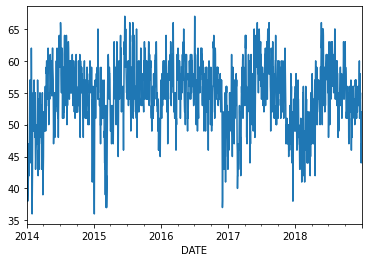

In [59]:
data["MaxTemp"].plot()

<AxesSubplot:xlabel='DATE'>

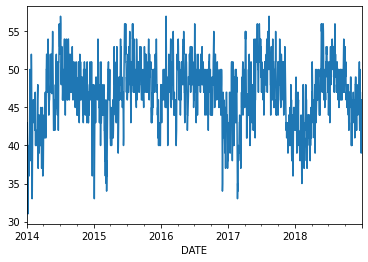

In [60]:
data["AvgTemp"].plot()

In [61]:
from statsmodels.tsa.stattools import adfuller

In [62]:
adfuller(data["AvgTemp"])

(-6.594563113389805,
 6.977825912591406e-09,
 12,
 1812,
 {'1%': -3.4339640110318004,
  '5%': -2.8631363845692475,
  '10%': -2.567619862152732},
 8176.215795705775)

In [ ]:
# since p value < 0.05 then accordingto default hyposthesis       --- the series is stationary

In [63]:
train=data[:1460]["AvgTemp"]
test=data[1461:]["AvgTemp"]

In [65]:
#model fitting

model_arima=ARIMA(train,order=(1,0,5))               # here 1,0,5 is checking bcz of the assignment question
model_fitt=model_arima.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [66]:
model_fitt.predict(test)

TypeError: Cannot convert input [DATE
2018-01-01    44.0
2018-01-02    44.0
2018-01-03    42.0
2018-01-04    47.0
2018-01-05    47.0
              ... 
2018-12-26    40.0
2018-12-27    39.0
2018-12-28    40.0
2018-12-29    42.0
2018-12-30    46.0
Name: AvgTemp, Length: 364, dtype: float64] of type <class 'pandas.core.series.Series'> to Timestamp

In [67]:
data['predict'] = model_fitt.predict(start= len(train),       
                                    end=len(train)+len(test)- 1, 
                                    dynamic=True)

In [68]:
data.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset,predict
DATE,,,,,,
2014-01-01,33.0,46.0,40.0,06:57:00,17:56:00,NaN
2014-01-02,35.0,50.0,43.0,06:57:00,17:56:00,NaN
2014-01-03,36.0,45.0,41.0,06:57:00,17:57:00,NaN
2014-01-04,32.0,41.0,37.0,06:58:00,17:57:00,NaN
2014-01-05,24.0,38.0,31.0,06:58:00,17:58:00,NaN


<AxesSubplot:xlabel='DATE'>

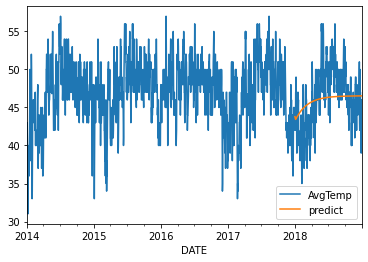

In [69]:
data[['AvgTemp','predict']].plot()

In [70]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

modl = SARIMAX(train, order=(1,0,5), seasonal_order=(1,0,5,12))
modl = modl.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='DATE'>

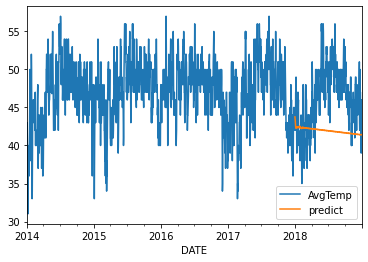

In [72]:
data['predict'] = modl.predict(start= len(train) ,
                                                       end=len(train)+len(test)- 1, 
                                                       dynamic=True)
data[['AvgTemp','predict']].plot()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='DATE'>

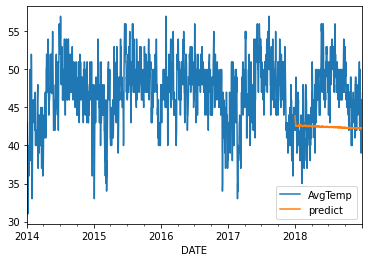

In [73]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

modl = SARIMAX(train, order=(2,0,5), seasonal_order=(2,0,5,12))
modl = modl.fit()
data['predict'] = modl.predict(start= len(train) ,
                                                       end=len(train)+len(test)- 1, 
                                                       dynamic=True)
data[['AvgTemp','predict']].plot()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='DATE'>

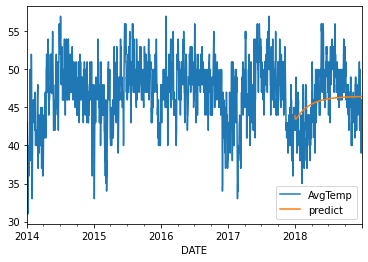

In [81]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

modl = ARIMA(train, order=(2,0,5))
modl = modl.fit()
data['predict'] = modl.predict(start= len(train) ,
                                                       end=len(train)+len(test)- 1, 
                                                       dynamic=True)
data[['AvgTemp','predict']].plot()

In [85]:
from sklearn.metrics import mean_squared_error,mean_absolute_error      # since is the regression problems so we can use Regression metrics
mean_absolute_error(data["AvgTemp"][1461:].dropna(),data["predict"].dropna())

3.060465985637895

In [86]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,mean_squared_log_error

mean_squared_log_error(data["AvgTemp"][1461:].dropna(),data["predict"].dropna())


0.006558353599527824

In [88]:
mean_squared_error(data["AvgTemp"][1461:].dropna(),data["predict"].dropna())


14.537263696833394

In [ ]:
#i think the mean_absolute_error is Comes according to the assignmnet answer which is around  1-3%   (May be i am not getting the answer)

In [89]:
3.060465985637895/(len(test))

0.008407873586917294